In [1]:
import sys
sys.path.insert(0,"/home/albert7a/lib/python")


## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar
from datetime import date
import json
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
jsonfile='medred_autumn.json'

In [3]:
sourcefile=open(jsonfile,'rU')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
print nb_profilesEN4

106


In [4]:
vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

print len(vert_standart)
all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))



97


In [11]:
def get_netcdf_profiles(jsonfile,infos,prof):
        list_profiles = infos.keys()
        reference_profile = str(list_profiles[prof])
        print 'Getting profile ', reference_profile

        namezone=jsonfile[0:-5]
        dirname="/media/extra/DATA/EN4/profiles_files/"+namezone
        netcdf_name=dirname+"/profiles_EN4-"+reference_profile[1:]+"_NATL60-CJM165_TS.nc"
        dsprof=xr.open_dataset(netcdf_name)

        depth_en4=dsprof['depth_en4']
        depth_model=dsprof['depth_model']
        temp_en4=dsprof['temp_profileEN4']
        salt_en4=dsprof['salt_profileEN4']
        mean_temp_model=dsprof['mean_temp_model']
        mean_salt_model=dsprof['mean_salt_model']
        percent10_temp_model=dsprof['percent10_temp_model']
        percent10_salt_model=dsprof['percent10_salt_model']
        percent90_temp_model=dsprof['percent90_temp_model']
        percent90_salt_model=dsprof['percent90_salt_model']



        return depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model

def project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart):

        temp_en4_standart=np.zeros(len(vert_standart))
        salt_en4_standart=np.zeros(len(vert_standart))
        mean_temp_model_standart=np.zeros(len(vert_standart))
        mean_salt_model_standart=np.zeros(len(vert_standart))
        percent10_temp_model_standart=np.zeros(len(vert_standart))
        percent10_salt_model_standart=np.zeros(len(vert_standart))
        percent90_temp_model_standart=np.zeros(len(vert_standart))
        percent90_salt_model_standart=np.zeros(len(vert_standart))

        for k in np.arange(len(vert_standart)-1):
            zs1=vert_standart[k]
            zs2=vert_standart[k+1]
            zs=(zs1+zs2)/2.
            idz=np.where(np.abs(depth_en4-zs)==np.min(np.abs(depth_en4-zs)))
            idz0=np.min(idz[0])
            if (idz0==0) | (idz0==len(depth_en4)-1):
                temp_en4_standart[k]='nan'
                salt_en4_standart[k]='nan'
                mean_temp_model_standart[k]='nan'
                mean_salt_model_standart[k]='nan'
                percent10_temp_model_standart[k]='nan'
                percent10_salt_model_standart[k]='nan'
                percent90_temp_model_standart[k]='nan'
                percent90_salt_model_standart[k]='nan'
            else:
                if depth_en4[idz0] < zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * temp_en4[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * temp_en4[idz0+1]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * salt_en4[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * salt_en4[idz0+1]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_temp_model[idz0+1]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_salt_model[idz0+1]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_temp_model[idz0+1]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_salt_model[idz0+1]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_temp_model[idz0+1]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_salt_model[idz0+1]
                    
                if depth_en4[idz0] > zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * temp_en4[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * temp_en4[idz0]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * salt_en4[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * salt_en4[idz0]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_temp_model[idz0]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_salt_model[idz0]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_temp_model[idz0]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_salt_model[idz0]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_temp_model[idz0]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_salt_model[idz0]



        return temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart


    
print time.strftime('%d/%m/%y %H:%M',time.localtime())

all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))

for prof in np.arange(nb_profilesEN4):
    depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(jsonfile,infos,prof)
    temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart = project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart)
    all_temp_mean_model[prof,:]=mean_temp_model_standart[:]
    all_salt_mean_model[prof,:]=mean_salt_model_standart[:]
    all_temp_en4[prof,:]=temp_en4_standart[:]
    all_salt_en4[prof,:]=salt_en4_standart[:]
    all_temp_percent10_model[prof,:]=percent10_temp_model_standart[:]
    all_salt_percent10_model[prof,:]=percent10_salt_model_standart[:]
    all_temp_percent90_model[prof,:]=percent90_temp_model_standart[:]
    all_salt_percent90_model[prof,:]=percent90_salt_model_standart[:]


print time.strftime('%d/%m/%y %H:%M',time.localtime())


11/10/17 15:47
Getting profile   A20120928-05823
Getting profile   A20121022-05495
Getting profile   A20121008-04069
Getting profile   A20121211-04361
Getting profile   A20121008-04026
Getting profile   A20121112-04589
Getting profile   A20121217-05012
Getting profile   A20121107-04080
Getting profile   A20121226-06006
Getting profile   A20120908-03663
Getting profile   A20121209-04139
Getting profile   A20121227-06067
Getting profile   A20121123-05807
Getting profile   A20121012-04459
Getting profile   A20121212-04437
Getting profile   A20121111-04509
Getting profile   A20121030-06371
Getting profile   A20120923-05205
Getting profile   A20120928-05766
Getting profile   A20121103-03687
Getting profile   A20121201-03303
Getting profile   A20121116-05044
Getting profile   A20121216-04890
Getting profile   A20121205-03723
Getting profile   A20121018-05091
Getting profile   A20121023-05618
Getting profile   A20121225-05924
Getting profile   A20121119-05373
Getting profile   A20121002-03401

In [12]:
all_temp_mean_model[all_temp_mean_model==0.]='nan'
all_salt_mean_model[all_salt_mean_model==0.]='nan'
all_temp_en4[all_temp_en4==0.]='nan'
all_salt_en4[all_salt_en4==0.]='nan'
all_temp_percent10_model[all_temp_percent10_model==0.]='nan'
all_salt_percent10_model[all_salt_percent10_model==0.]='nan'
all_temp_percent90_model[all_temp_percent90_model==0.]='nan'
all_salt_percent90_model[all_salt_percent90_model==0.]='nan'


In [13]:
all_temp_bias=all_temp_mean_model-all_temp_en4
mean_temp_bias=np.nanmin(all_temp_bias,0)
all_salt_bias=all_salt_mean_model-all_salt_en4
mean_salt_bias=np.nanmin(all_salt_bias,0)
all_temp_percent10_cent=all_temp_percent10_model-all_temp_mean_model
all_temp_percent10_bias=all_temp_percent10_model-all_temp_en4
temp_percent10=np.nanmin(all_temp_percent10_cent,0)
temp_percent10_bias=np.nanmin(all_temp_percent10_bias,0)
all_salt_percent10_cent=all_salt_percent10_model-all_salt_mean_model
all_salt_percent10_bias=all_salt_percent10_model-all_salt_en4
salt_percent10=np.nanmin(all_salt_percent10_cent,0)
salt_percent10_bias=np.nanmin(all_salt_percent10_bias,0)
all_temp_percent90_cent=all_temp_percent90_model-all_temp_mean_model
all_temp_percent90_bias=all_temp_percent90_model-all_temp_en4
temp_percent90=np.nanmin(all_temp_percent90_cent,0)
temp_percent90_bias=np.nanmin(all_temp_percent90_bias,0)
all_salt_percent90_cent=all_salt_percent90_model-all_salt_mean_model
all_salt_percent90_bias=all_salt_percent90_model-all_salt_en4
salt_percent90=np.nanmin(all_salt_percent90_cent,0)
salt_percent90_bias=np.nanmin(all_salt_percent90_bias,0)

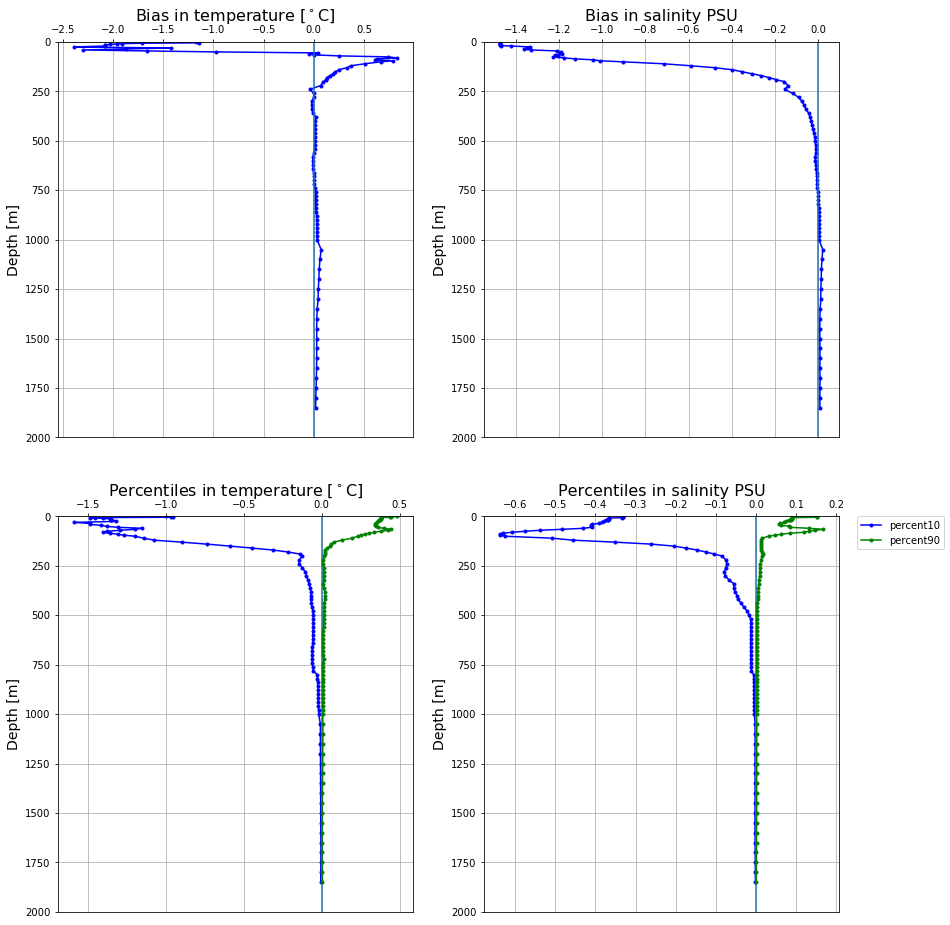

In [14]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[2,2])
fig1 = plt.figure(figsize=(14, 16))  # (w,h)

ax1 = plt.subplot(gs[0,0])

ax1.plot(mean_temp_bias,vert_standart,'b.-')
ax1.set_xlabel('Bias in temperature [$^\circ$C]', size=16)
ax1.set_ylabel('Depth [m]', size=14)
ax1.set_ylim(2000, 0)
ax1.grid(True, which='both')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.axvline(0)

ax2 = plt.subplot(gs[0,1])

ax2.plot(mean_salt_bias,vert_standart,'b.-')
ax2.set_xlabel('Bias in salinity PSU', size=16)
ax2.set_ylabel('Depth [m]', size=14)
ax2.set_ylim(2000, 0)
ax2.grid(True, which='both')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.axvline(0)


ax3 = plt.subplot(gs[1,0])

ax3.plot(temp_percent10,vert_standart,'b.-', label='percent10')
ax3.set_xlabel('Percentiles in temperature [$^\circ$C]', size=16)
ax3.set_ylabel('Depth [m]', size=14)
ax3.set_ylim(2000, 0)
ax3.grid(True, which='both')
ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top') 
ax3.axvline(0)
ax3.plot(temp_percent90,vert_standart,'g.-', label='percent90')

ax4 = plt.subplot(gs[1,1])

ax4.plot(salt_percent10,vert_standart,'b.-', label='percent10')
ax4.set_xlabel('Percentiles in salinity PSU', size=16)
ax4.set_ylabel('Depth [m]', size=14)
ax4.set_ylim(2000, 0)
ax4.grid(True, which='both')
ax4.xaxis.tick_top()
ax4.xaxis.set_label_position('top') 
ax4.axvline(0)
ax4.plot(salt_percent90,vert_standart,'g.-', label='percent90')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

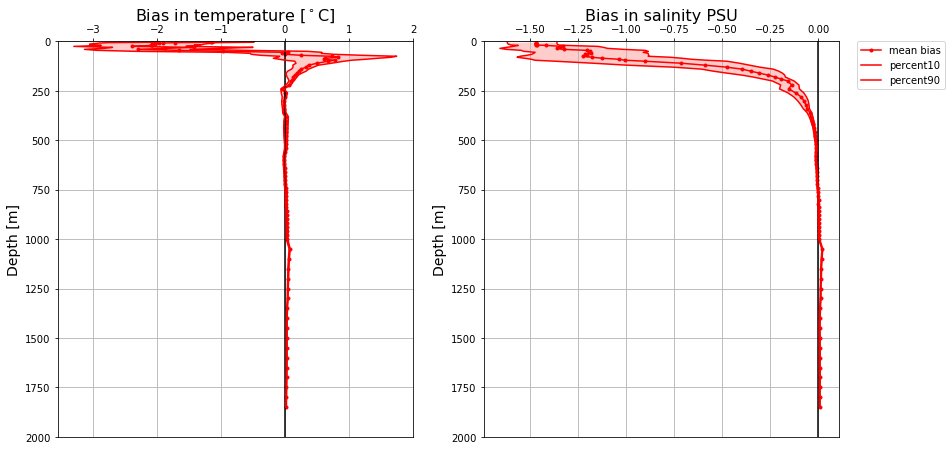

In [15]:
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[2,2])
fig1 = plt.figure(figsize=(14, 16))  # (w,h)

ax1 = plt.subplot(gs[0,0])

ax1.plot(mean_temp_bias,vert_standart,'r.-', label='mean bias')
ax1.set_xlabel('Bias in temperature [$^\circ$C]', size=16)
ax1.set_ylabel('Depth [m]', size=14)
ax1.set_ylim(2000, 0)
ax1.grid(True, which='both')
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top') 
ax1.axvline(0,color='k')
ax1.plot(temp_percent10_bias,vert_standart,'r-', label='percent10')
ax1.plot(temp_percent90_bias,vert_standart,'r-', label='percent90')
ax1.fill_betweenx(vert_standart, temp_percent10_bias, x2=temp_percent90_bias, alpha=0.2, facecolor='r')

ax2 = plt.subplot(gs[0,1])

ax2.plot(mean_salt_bias,vert_standart,'r.-', label='mean bias')
ax2.set_xlabel('Bias in salinity PSU', size=16)
ax2.set_ylabel('Depth [m]', size=14)
ax2.set_ylim(2000, 0)
ax2.grid(True, which='both')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top') 
ax2.axvline(0,color='k')
ax2.plot(salt_percent10_bias,vert_standart,'r-', label='percent10')
ax2.plot(salt_percent90_bias,vert_standart,'r-', label='percent90')
ax2.fill_betweenx(vert_standart, salt_percent10_bias, x2=salt_percent90_bias, alpha=0.2, facecolor='r')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

